In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import yfinance as yf
from pandas_datareader import data, wb

In [2]:
from datetime import datetime

In [3]:
# Stock tickers for technology stocks
tech_list = ['AAPL','GOOG','MFST','AMZN']

In [4]:
end = datetime.now()

# start date a year ago from today's year minus one --data from Yahoo Finance
start = datetime(end.year-1,end.month,end.day)

In [5]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start,end)

In [6]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-08,83.400002,81.830002,82.562500,83.364998,95654400.0,82.807037
2020-06-09,86.402496,83.002502,83.035004,85.997498,147712400.0,85.421921
2020-06-10,88.692497,86.522499,86.974998,88.209999,166651600.0,87.619614
2020-06-11,87.764999,83.870003,87.327499,83.974998,201662400.0,83.412964
2020-06-12,86.949997,83.555000,86.180000,84.699997,200146000.0,84.133095
...,...,...,...,...,...,...
2021-05-28,125.800003,124.550003,125.570000,124.610001,71311100.0,124.610001
2021-06-01,125.349998,123.940002,125.080002,124.279999,67637100.0,124.279999
2021-06-02,125.239998,124.050003,124.279999,125.059998,59278900.0,125.059998


In [7]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-08,1447.989990,1422.339966,1422.339966,1446.609985,1404200,1446.609985
2020-06-09,1468.000000,1443.209961,1445.359985,1456.160034,1409200,1456.160034
2020-06-10,1474.259033,1456.270020,1459.540039,1465.849976,1525200,1465.849976
2020-06-11,1454.474976,1402.000000,1442.479980,1403.839966,1991300,1403.839966
2020-06-12,1437.000000,1386.020020,1428.489990,1413.180054,1946400,1413.180054


In [8]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-08,2530.000000,2487.340088,2500.199951,2524.060059,3970700,2524.060059
2020-06-09,2626.429932,2525.000000,2529.439941,2600.860107,5176000,2600.860107
2020-06-10,2722.350098,2626.260010,2645.000000,2647.449951,4946000,2647.449951
2020-06-11,2671.379883,2536.229980,2603.500000,2557.959961,5800100,2557.959961
2020-06-12,2621.479980,2503.350098,2601.209961,2545.020020,5436100,2545.020020


In [9]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,120.292251,117.202380,118.861773,118.763526,1.261570e+08,118.357480
std,13.817997,13.607902,13.836797,13.683827,5.369327e+07,13.798260
min,83.400002,81.830002,82.562500,83.364998,4.669130e+07,82.807037
25%,115.490002,112.235001,113.980000,113.669998,8.892310e+07,113.036911
50%,123.349998,120.010002,121.650002,121.260002,1.119326e+08,121.054382
75%,129.735001,126.785000,128.580002,128.000004,1.525730e+08,127.752335
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-08 to 2021-06-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

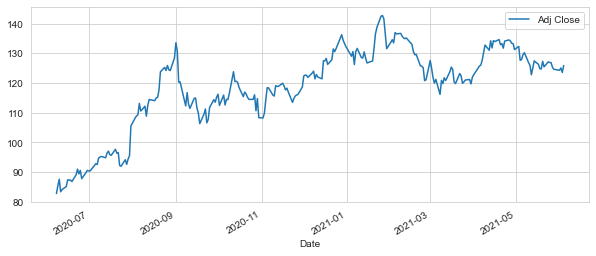

In [11]:
# Apple's adjusted closing price for the past year

AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

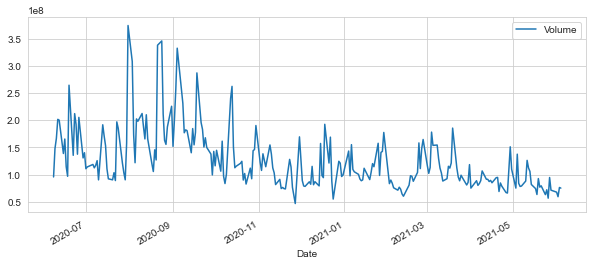

In [12]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

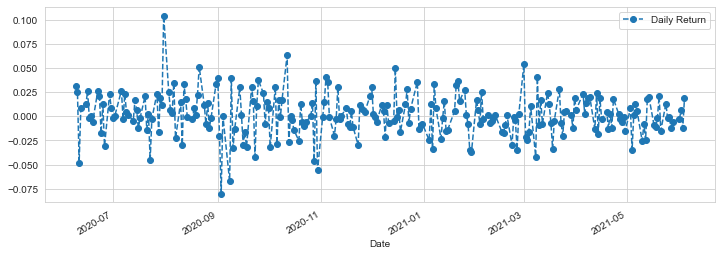

In [13]:
# new column for daily return with daily percent change
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

<AxesSubplot:>

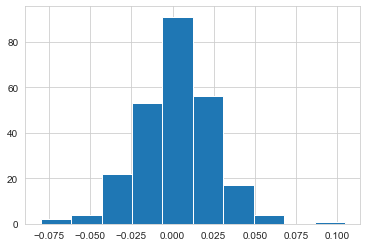

In [14]:
AAPL['Daily Return'].hist()

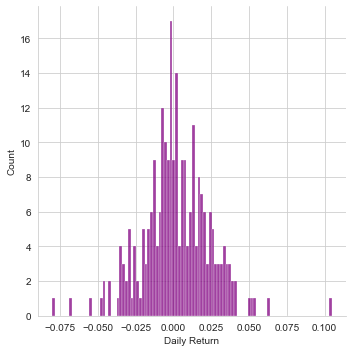

In [15]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [16]:
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [17]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-08,82.807037,1446.609985,186.553680,2524.060059
2020-06-09,85.421921,1456.160034,187.979889,2600.860107
2020-06-10,87.619614,1465.849976,194.952362,2647.449951
2020-06-11,83.412964,1403.839966,184.483734,2557.959961
2020-06-12,84.133095,1413.180054,185.939621,2545.020020


In [18]:
# Create a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [19]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-06-08,NaN,NaN,NaN,NaN
2020-06-09,0.031578,0.006602,0.007645,0.030427
2020-06-10,0.025728,0.006654,0.037092,0.017913
2020-06-11,-0.048010,-0.042303,-0.053698,-0.033802
2020-06-12,0.008633,0.006653,0.007892,-0.005059


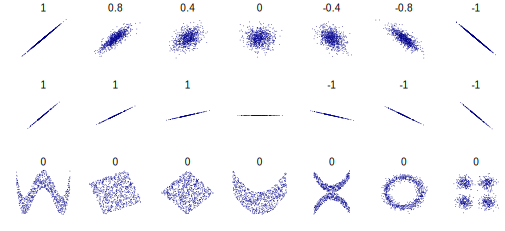

In [20]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

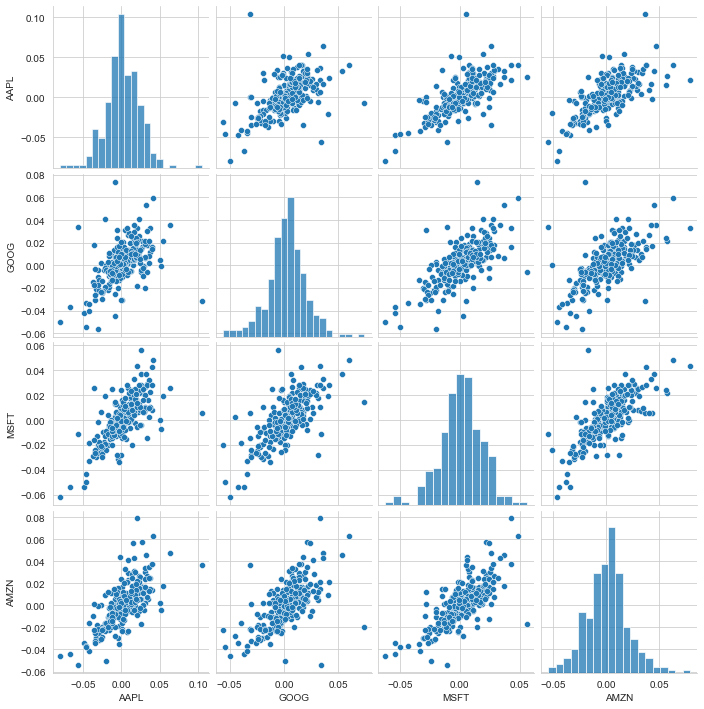

In [21]:
# Pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

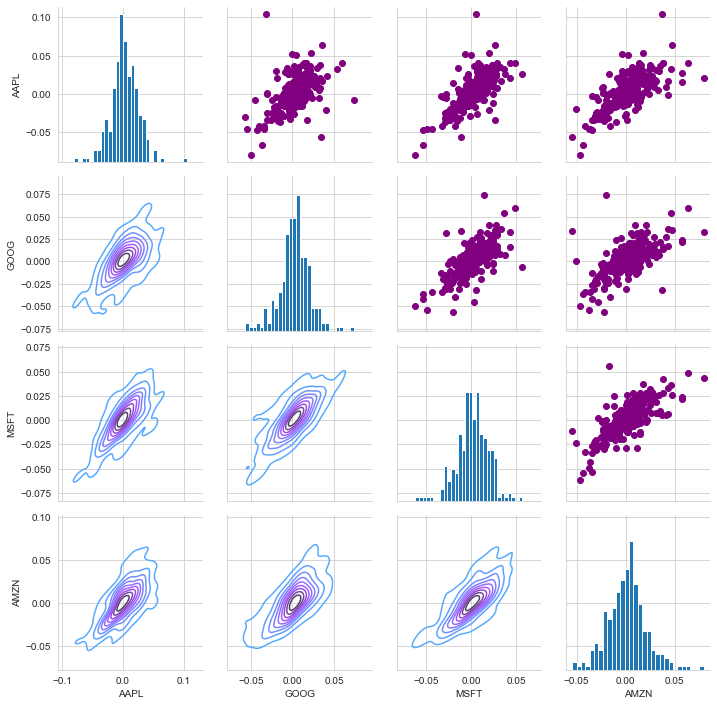

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Define the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# Define the lower triangle in the figure, including the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)